The code below creates a dataset for training with linear regression.  Your goal is to apply linear, ridge, and lasso regression on this dataset.  

You should test for three cases: 


1.   ```y=yclean (no noise)```
2.   ```y+np.random.normal(0,np.std(y)/2,y.shape)```
3.   ```y=y+np.random.normal(0,np.std(y)*3,y.shape)```

For ridge regression, you should evaluate lambda = [0.01, 0.1,  0.2, 0.25, 0.3, 0.35, 0.5,10,100,200]

For lasso regression, you should evalaute lambda (alpha) = [0.01, 0.02, 0.03, 0.04, 0.05, 0.08, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35]

after evaluating, you should plot your results by using the regplot function provided below.  Note that the input to the function can be a list, for example by appending coefficients after every run with a different lambda, e.g.:

```coefs.append(model.coef_)```


In [1]:
import numpy as np
#from google.colab import files
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import sklearn  
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

#random seed
np.random.seed(20)
# vector of 2000 samples / dimensionality 5
X=np.random.randn(2000,5)
#X1=np.random.randn(2000,5)
#X2=np.random.randn(2000,5)

#scaling 
X=scale(X) #note that in a real scenario, should learn scaling on training data and then transform the testing data appropriately
#X1=scale(X1)
#X2=scale(X2)

#x0, x1, x2, x3, x4 [intercept ]
#true function is 2*x1 + 0.5*x3 + 2*x4
yclean=2*X[:,1] + 0.5*X[:,3] + 2*X[:,4]
y0= yclean
y1= y0+np.random.normal(0,np.std(y0)/2,y0.shape)
y2= y0+np.random.normal(0,np.std(y0)*3,y0.shape)

from sklearn.model_selection import train_test_split
X0_train, X0_test, y0_train, y0_test = train_test_split(X, y0, test_size=0.33, random_state=42)
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.33, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.33, random_state=42)


# inputs are lists, except method which is a string (e.g., 'lasso' or 'ridge)
# L contains regularization values, coefs the coefficients, and errors the errors
def regplot(L,coefs,errors,method):
    plt.figure(figsize=(20, 6))

    plt.subplot(121)
    ax = plt.gca()
    ax.plot(L, coefs)
    ax.set_xscale('log')
    plt.xlabel('alpha')
    plt.ylabel('weights')
    plt.title(method + ' coefficients as a function of the regularization')
    plt.axis('tight')

    plt.subplot(122)
    ax = plt.gca()
    ax.plot(L, errors)
    ax.set_xscale('log')
    plt.xlabel('alpha')
    plt.ylabel('error')
    plt.title(method+' error as a function of the regularization')
    plt.axis('tight')

    plt.show()


In [2]:
R_lam = [0.01, 0.1, 0.2, 0.25, 0.3, 0.35, 0.5,10,100,200]
R_coef_0,R_coef_1,R_coef_2 = [],[],[]
R_error_0,R_error_1,R_error_2 = [],[],[]

for i in R_lam:
    
    model_0 = Ridge(i)
    model_1 = Ridge(i)
    model_2 = Ridge(i)
    
    model_0.fit(X0_train,y0_train)
    model_1.fit(X1_train,y1_train)
    model_2.fit(X2_train,y2_train)
    
    R_coef_0.append(model_0.coef_)
    R_coef_1.append(model_1.coef_)
    R_coef_2.append(model_2.coef_)
    
    y0_pred=model_0.predict(X0_test)
    y1_pred=model_1.predict(X1_test)
    y2_pred=model_2.predict(X2_test)
    
    R_error_0.append(mean_squared_error(y0_test,y0_pred))
    R_error_1.append(mean_squared_error(y1_test,y1_pred))
    R_error_2.append(mean_squared_error(y2_test,y2_pred))

In [3]:
lam = [0.01, 0.02, 0.03, 0.04, 0.05, 0.08, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35]
L_coef_0,L_coef_1,L_coef_2 = [],[],[]
L_error_0,L_error_1,L_error_2 = [],[],[]
for i in lam:
    model_0 = Lasso(i)
    model_1 = Lasso(i)
    model_2 = Lasso(i)
    
    model_0.fit(X0_train,y0_train)
    model_1.fit(X1_train,y1_train)
    model_2.fit(X2_train,y2_train)
    
    #print(model.score(X_train,y_train))
    L_coef_0.append(model_0.coef_)
    L_coef_1.append(model_1.coef_)
    L_coef_2.append(model_2.coef_)
    
    y0_pred=model_0.predict(X0_test)
    y1_pred=model_1.predict(X1_test)
    y2_pred=model_2.predict(X2_test)
    
    L_error_0.append(mean_squared_error(y0_test,y0_pred))
    L_error_1.append(mean_squared_error(y1_test,y1_pred))
    L_error_2.append(mean_squared_error(y2_test,y2_pred))


### yclean

##### Regression

In [4]:
modelLR=LinearRegression(fit_intercept=True)
modelLR.fit(X0_train, y0_train)
y0_pred=modelLR.predict(X0_test)
print("Parameters:", modelLR.coef_,"\n Intercept:",modelLR.intercept_," \n Error=",mean_squared_error(y0_test,y0_pred))

Parameters: [-2.39567467e-16  2.00000000e+00  1.60576704e-15  5.00000000e-01
  2.00000000e+00] 
 Intercept: -9.020562075079397e-17  
 Error= 2.4458661313688152e-29


##### Ridge

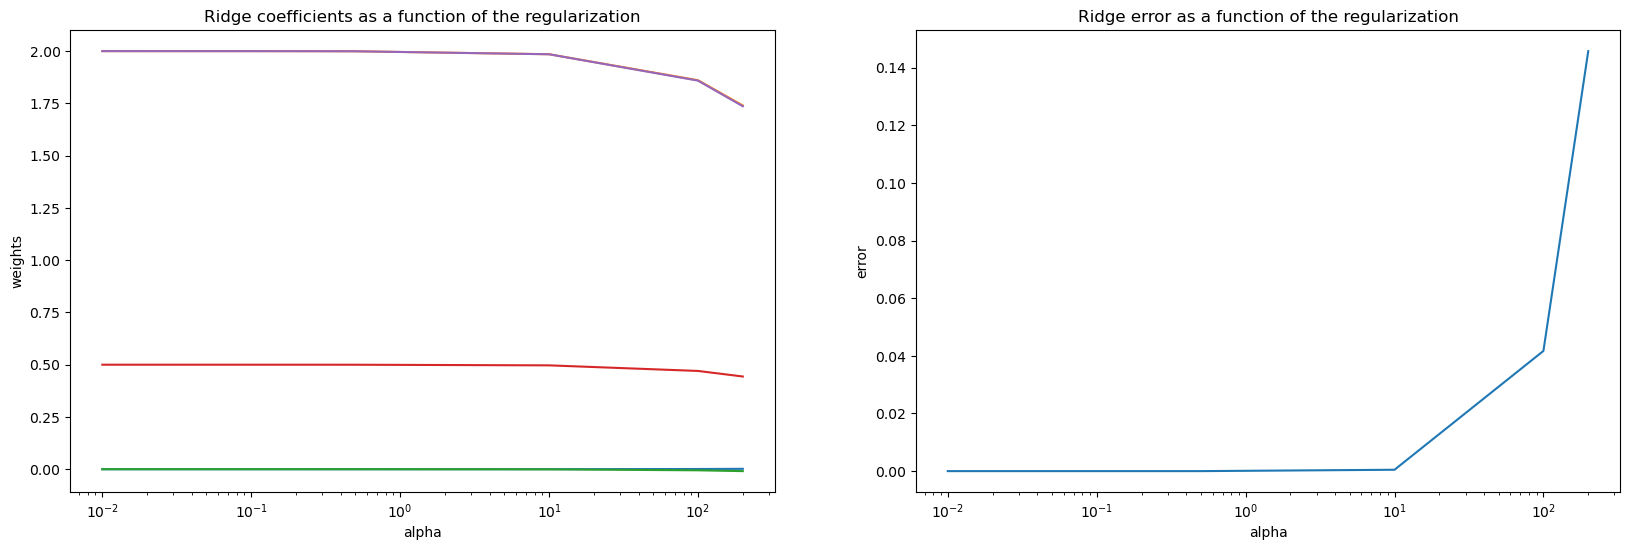

In [5]:
regplot(R_lam,R_coef_0,R_error_0,"Ridge")

##### Lasso

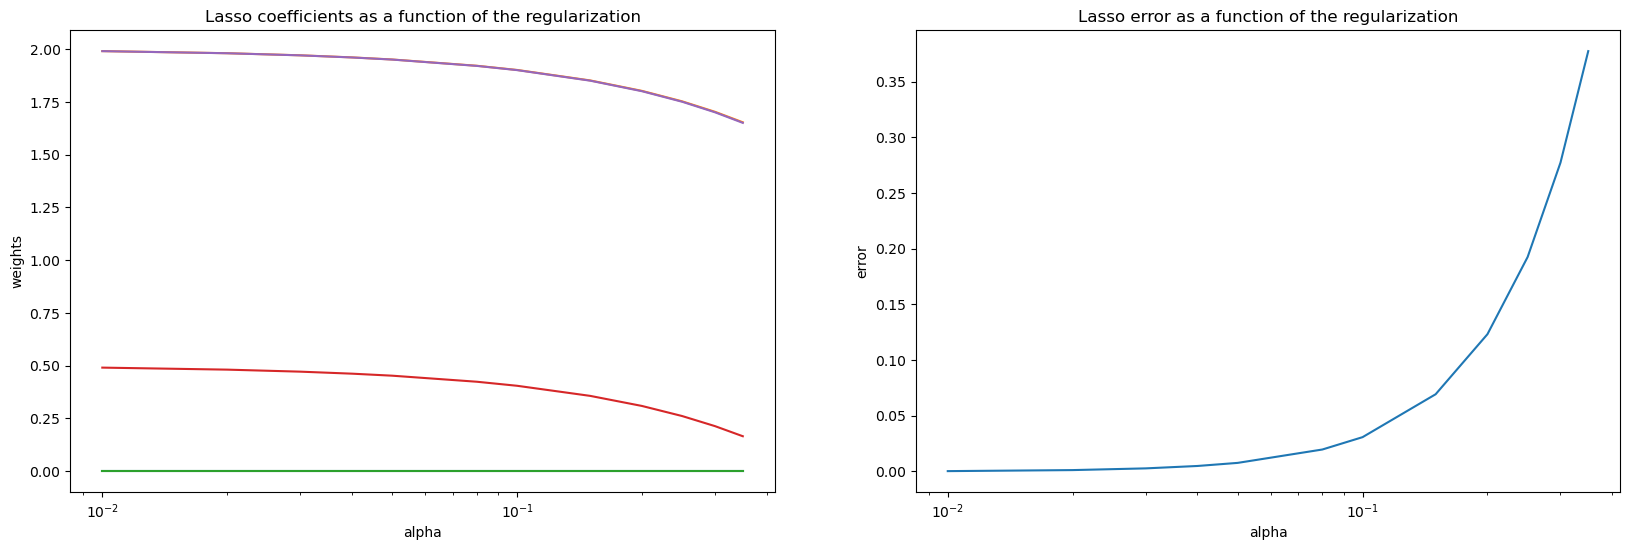

In [6]:
regplot(lam,L_coef_0,L_error_0,"Lasso")

### y+np.random.normal(0,np.std(y)/2,y.shape)

##### Regression

In [7]:
modelLR.fit(X1_train, y1_train)
y1_pred=modelLR.predict(X1_test)
print("Parameters:", modelLR.coef_, "\n Intercept:",modelLR.intercept_," \n Error=",mean_squared_error(y1_test,y1_pred))

Parameters: [1.02210460e-03 2.01715416e+00 4.83826256e-02 5.26855587e-01
 1.98091329e+00] 
 Intercept: -0.028311750779069667  
 Error= 2.20128849030745


##### Ridge

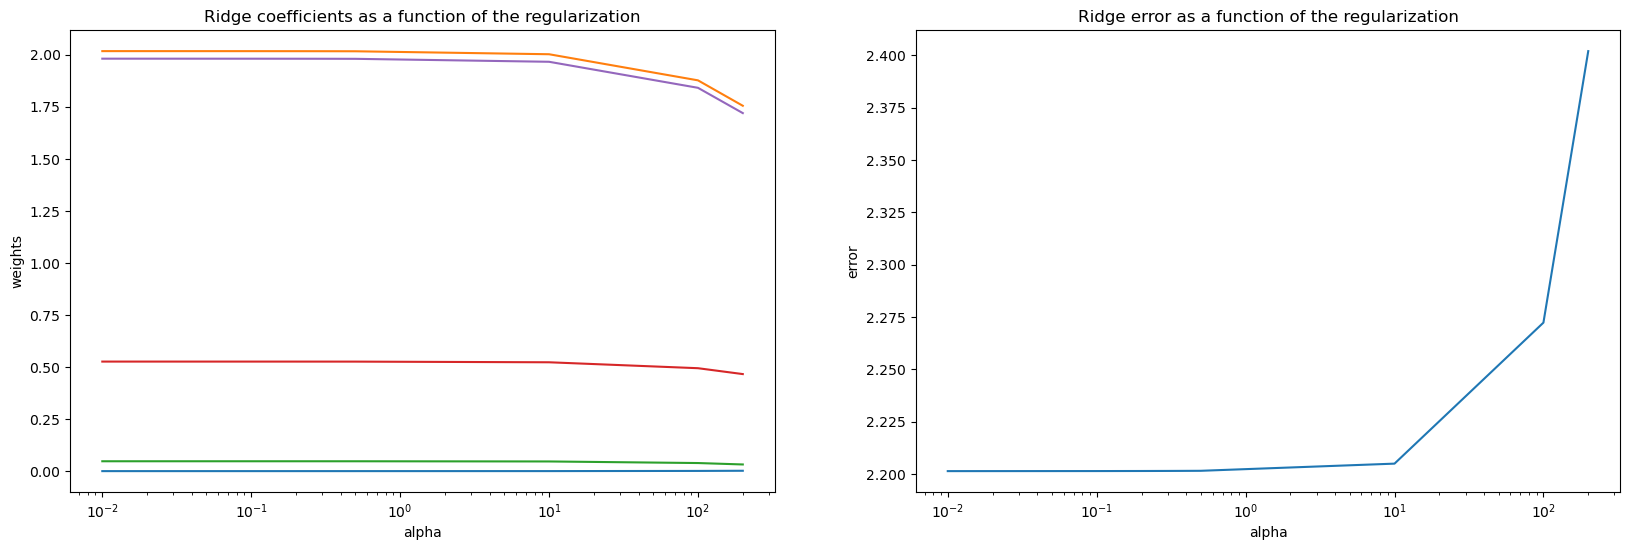

In [8]:
regplot(R_lam,R_coef_1,R_error_1,"Ridge")

##### Lasso

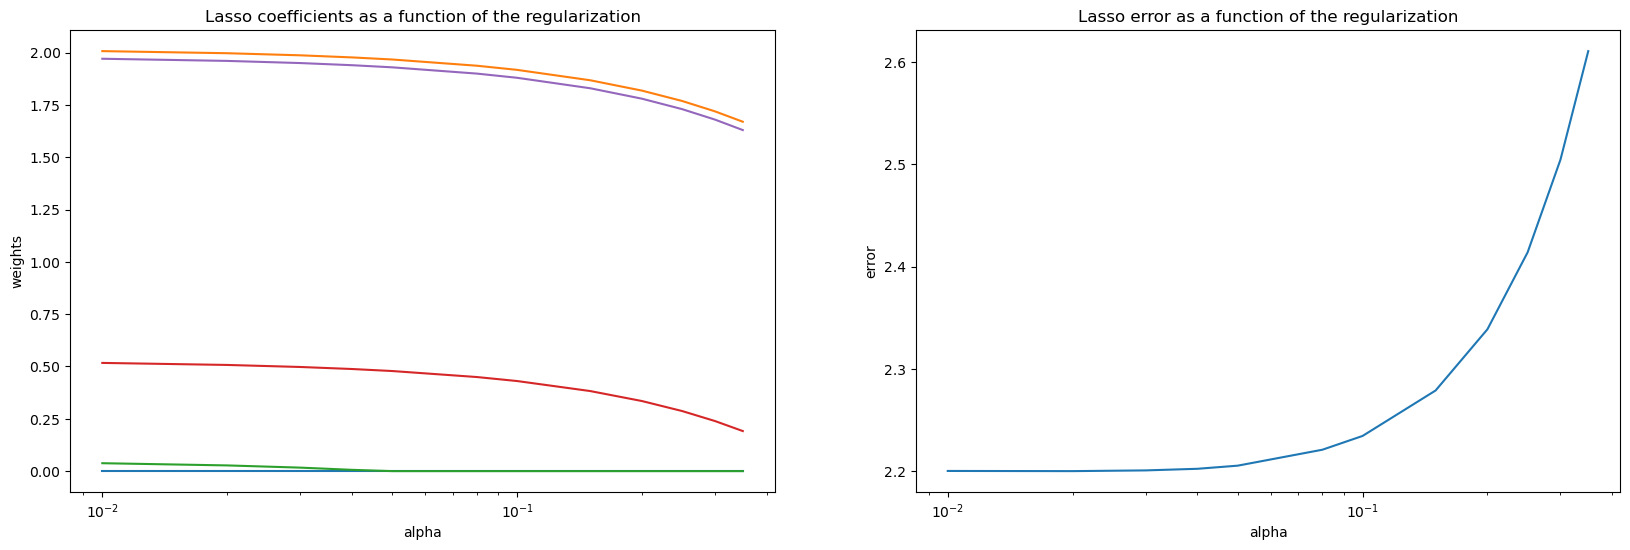

In [9]:
regplot(lam,L_coef_1,L_error_1,"Lasso")

### y = y+np.random.normal(0,np.std(y)*3,y.shape)

##### Regression

In [10]:
modelLR.fit(X2_train, y2_train)
y2_pred=modelLR.predict(X2_test)
print("Parameters:", modelLR.coef_,"\n Intercept:",modelLR.intercept_," \n Error=",mean_squared_error(y2_test,y2_pred))

Parameters: [-0.20036807  2.02176442  0.18935225  0.30457452  1.59813698] 
 Intercept: 0.07079947123167579  
 Error= 83.77231467212042


##### Ridge

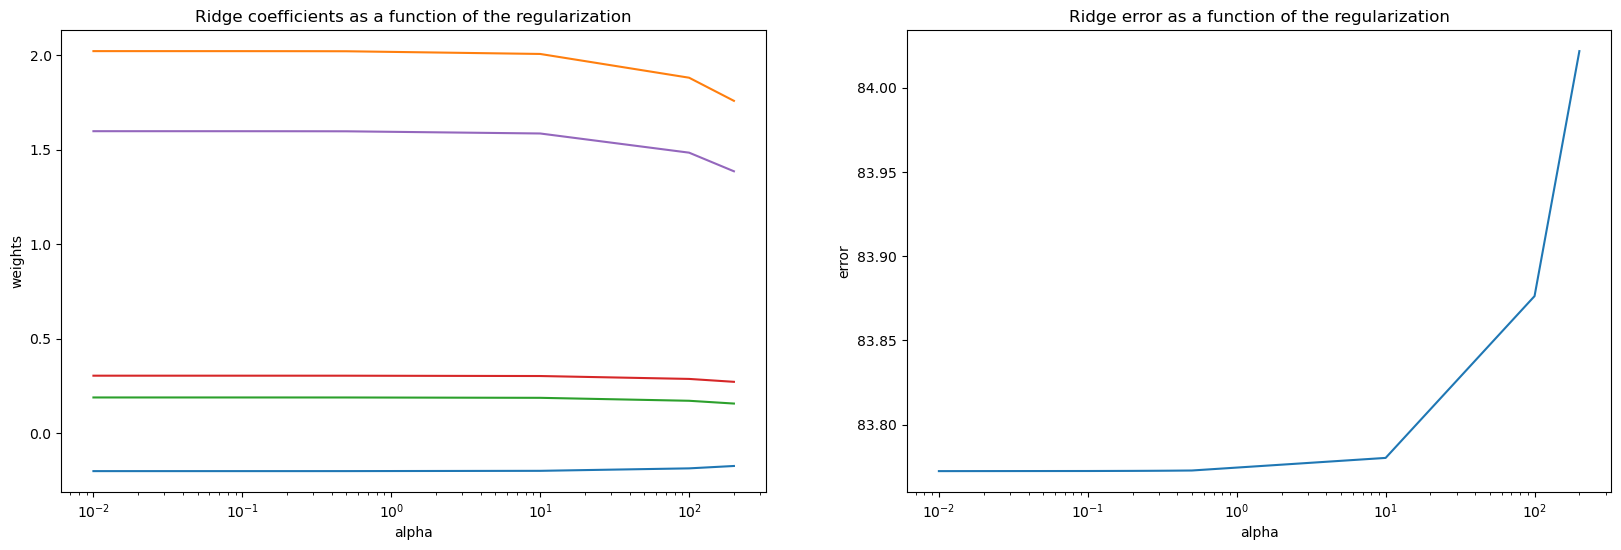

In [11]:
regplot(R_lam,R_coef_2,R_error_2,"Ridge")

##### Lasso

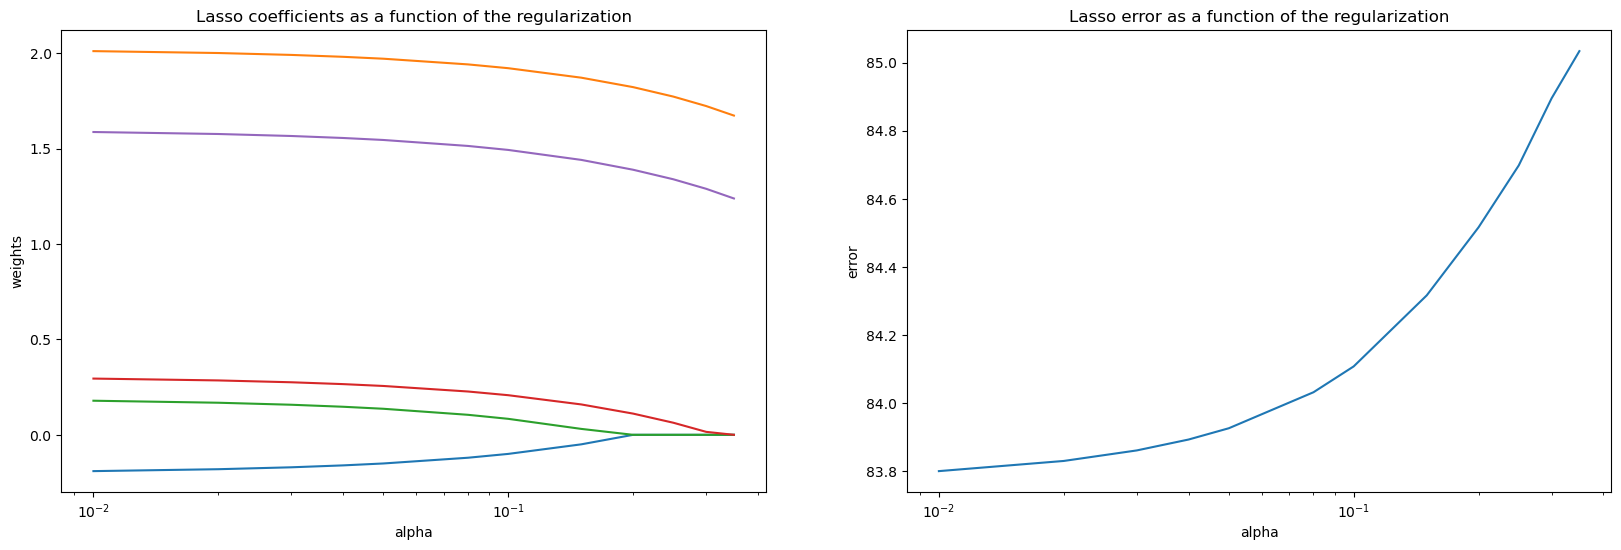

In [12]:
regplot(lam,L_coef_2,L_error_2,"Lasso")

In [76]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [95]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [ ]:
import math
import matplotlib.pyplot as plt

# Define the array of values to use
n_values = [1000, 10000, 100000]

# Define the number of times to run the computation
num_runs = 10

# Create a list to hold the pi estimates
pi_estimates = []

# Loop through each value in the array
for n in n_values:
    # Run the computation num_runs times and average the results
    pi_estimate = 0
    for i in range(num_runs):
        pi_estimate += sum([4.0*(-1)**i/(2*i+1) for i in range(n)])
    pi_estimate /= num_runs
    pi_estimates.append(pi_estimate)

# Plot the results
plt.plot(n_values, pi_estimates, 'o-')
plt.xscale('log') # set x-axis to logarithmic scale
plt.xlabel('n')
plt.ylabel('Pi Estimate')
plt.show()



In [13]:
import random
import math
import numpy as np

# Set the length of the needle and the distance between the lines
L = 1
d = 2

# Set the number of trials
num_trials = 10000

# Initialize the count of trials in which the needle crosses a line
crossed_lines = 0

# Loop over the trials
for i in range(num_trials):
    # Choose a random angle and a random position of the center of the needle
    theta = random.uniform(0, math.pi)
    x = random.uniform(0, d/2)

    # Check if the needle crosses a line
    if x <= L/2 * math.sin(theta):
        crossed_lines += 1

# Estimate pi using the formula pi = 2L / (d * P), where P is the probability of crossing a line
F= num_trials-crossed_lines
P = crossed_lines / num_trials
pi_est = 2 * L / (d * P)

#l_p = (2*num_trials/crossed_lines)*((L-np.sqrt(L**2 - d**2))/d + np.arccos(d/L))

# Print the estimated value of pi
print("Estimated value of pi: ",pi_est, "failed:",F)


Estimated value of pi:  3.131850923896023 failed: 6807
